In [13]:
# First we import libraries

import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


import .csv file

In [14]:
df=pd.read_csv(r"C:\Users\shish\supervised Machine learning\ford.csv")



In [15]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [16]:
df.shape

(17966, 9)

Check if there is any null values present in our dataset

In [17]:
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [18]:
df["price"].describe()

count    17966.000000
mean     12279.534844
std       4741.343657
min        495.000000
25%       8999.000000
50%      11291.000000
75%      15299.000000
max      54995.000000
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='Count'>

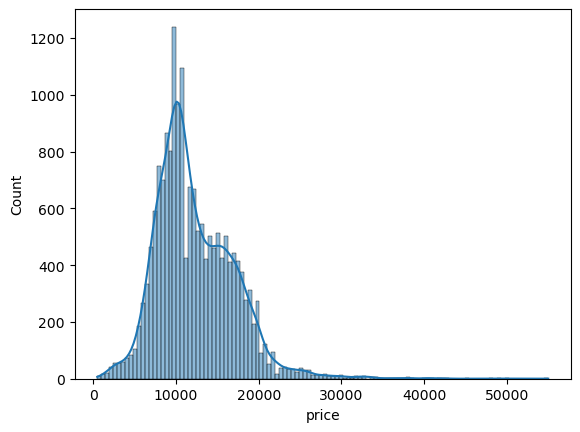

In [19]:

sns.histplot(df.price,kde=True)


In [20]:
There are so many outliers we have to remove this .
We use IQR method to remove outliers .
we cannot use mean and standard deviation method in price because price is skewed data 

SyntaxError: invalid syntax (1952993367.py, line 1)

In [ ]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("lower bound:", lower_bound,
      "upper bound:", upper_bound,
      "IQR:", IQR)


lower bound: -451.0 upper bound: 24749.0 IQR: 6300.0


In [ ]:
Now we remove data that lies outside lower and upper bound and store in new dataframe df_clean

In [ ]:
df_clean = df[(df['price'] >= lower_bound) &
              (df['price'] <= upper_bound)]


In [ ]:
df_clean.shape

(17680, 9)

In [ ]:
we remove 17966-17795=171 rows

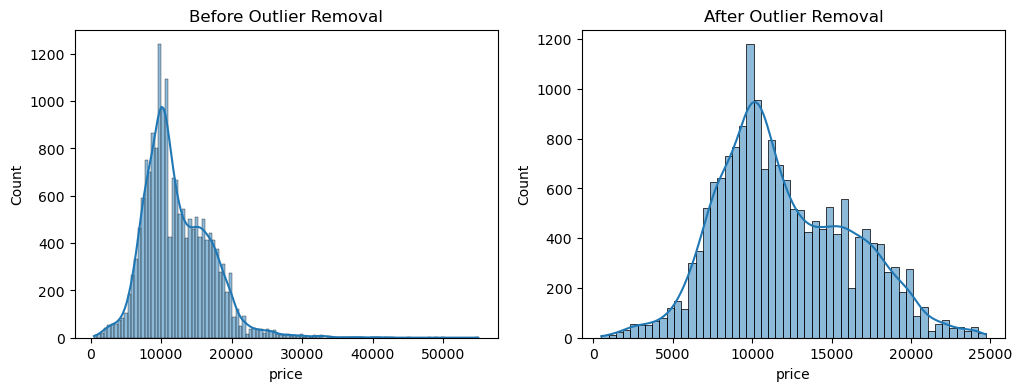

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.histplot(df['price'], kde=True)
plt.title("Before Outlier Removal")

plt.subplot(1,2,2)
sns.histplot(df_clean['price'], kde=True)
plt.title("After Outlier Removal")

plt.show()


In [ ]:
df_clean['log_price'] = np.log(df_clean['price'])

C:\Users\shish\AppData\Local\Temp\ipykernel_21544\1072968943.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['log_price'] = np.log(df_clean['price'])


Check the relation between other columns with price

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


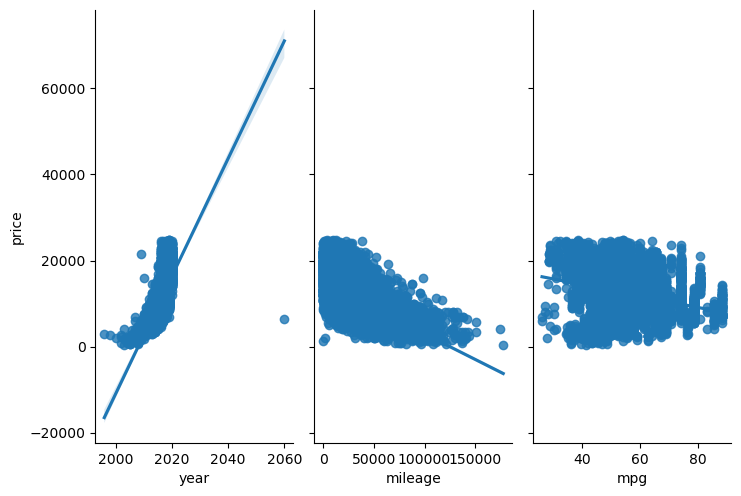

In [ ]:
sns.pairplot(df_clean,x_vars=['year','mileage','mpg'],y_vars=['price'],height=5,aspect=0.5,kind='reg')

From above pairplot grapg
1.Price vs Year->Upward slope → price increases as year increases
2.Price vs Mileage->Downward slope → higher mileage reduces value
3.Price vs MPG->MPG has much less impact on price compared to year and mileage

<Axes: >

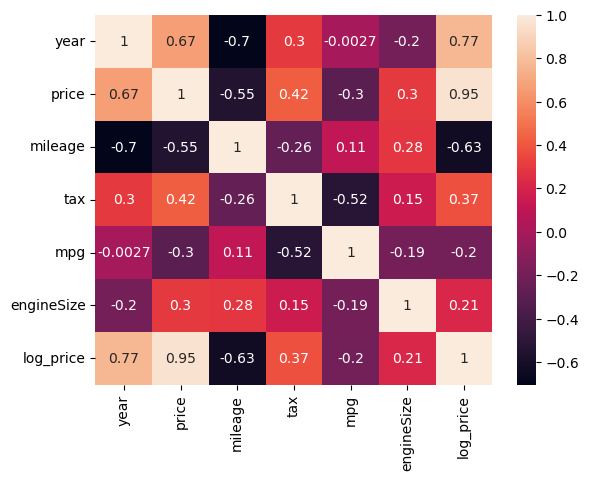

In [ ]:
sns.heatmap(df_clean.corr(numeric_only=True),annot=True)

Use some EDA (Exploratory Data Analysis):It is the process of understanding our data before building models

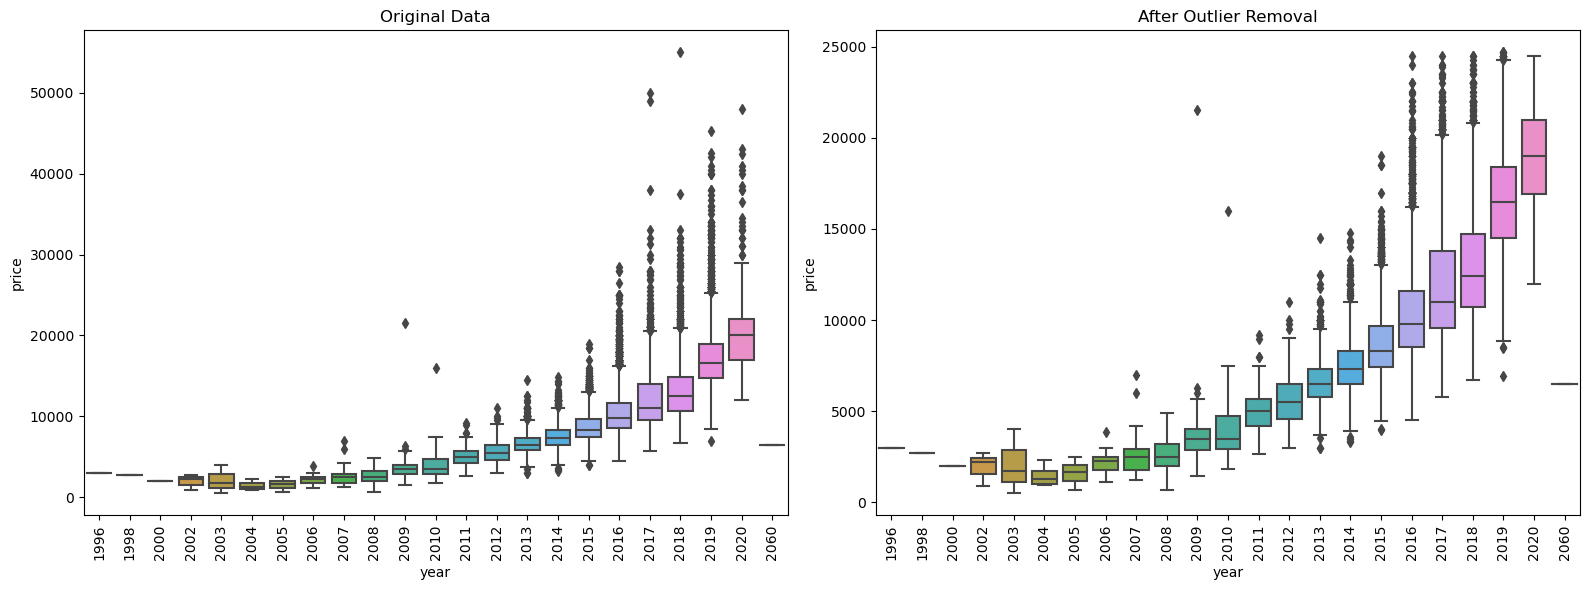

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Original data
sns.boxplot(x="year", y="price", data=df, ax=axes[0])
axes[0].set_title("Original Data")
axes[0].tick_params(axis='x', rotation=90)

# Cleaned data
sns.boxplot(x="year", y="price", data=df_clean, ax=axes[1])
axes[1].set_title("After Outlier Removal")
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

It also show outliers in our data set. (outliers are those back 🔹)

<Axes: xlabel='mileage', ylabel='price'>

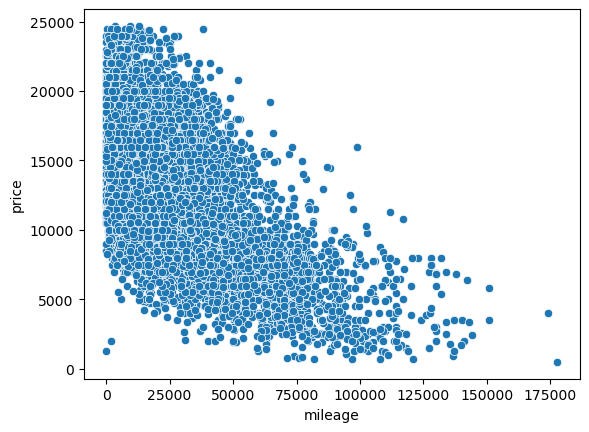

In [ ]:
sns.scatterplot(x="mileage",y="price",data=df_clean)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 [Text(0, 0, ' Fiesta'),
  Text(1, 0, ' Focus'),
  Text(2, 0, ' Puma'),
  Text(3, 0, ' EcoSport'),
  Text(4, 0, ' Kuga'),
  Text(5, 0, ' C-MAX'),
  Text(6, 0, ' Mondeo'),
  Text(7, 0, ' Ka+'),
  Text(8, 0, ' Tourneo Custom'),
  Text(9, 0, ' S-MAX'),
  Text(10, 0, ' B-MAX'),
  Text(11, 0, ' Edge'),
  Text(12, 0, ' Tourneo Connect'),
  Text(13, 0, ' Grand C-MAX'),
  Text(14, 0, ' KA'),
  Text(15, 0, ' Galaxy'),
  Text(16, 0, ' Grand Tourneo Connect'),
  Text(17, 0, ' Mustang'),
  Text(18, 0, ' Fusion'),
  Text(19, 0, ' Ranger'),
  Text(20, 0, ' Streetka'),
  Text(21, 0, ' Escort'),
  Text(22, 0, ' Transit Tourneo'),
  Text(23, 0, 'Focus')])

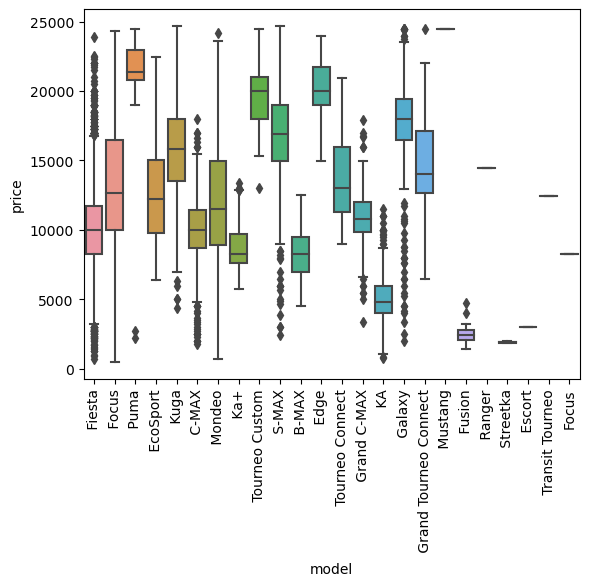

In [ ]:
sns.boxplot(x="model",y="price",data=df_clean)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 [Text(0, 0, '0'),
  Text(1, 0, '20'),
  Text(2, 0, '22'),
  Text(3, 0, '30'),
  Text(4, 0, '110'),
  Text(5, 0, '115'),
  Text(6, 0, '120'),
  Text(7, 0, '125'),
  Text(8, 0, '135'),
  Text(9, 0, '140'),
  Text(10, 0, '145'),
  Text(11, 0, '150'),
  Text(12, 0, '155'),
  Text(13, 0, '160'),
  Text(14, 0, '165'),
  Text(15, 0, '185'),
  Text(16, 0, '190'),
  Text(17, 0, '195'),
  Text(18, 0, '200'),
  Text(19, 0, '205'),
  Text(20, 0, '210'),
  Text(21, 0, '220'),
  Text(22, 0, '230'),
  Text(23, 0, '235'),
  Text(24, 0, '240'),
  Text(25, 0, '260'),
  Text(26, 0, '265'),
  Text(27, 0, '270'),
  Text(28, 0, '290'),
  Text(29, 0, '300'),
  Text(30, 0, '305'),
  Text(31, 0, '325'),
  Text(32, 0, '330'),
  Text(33, 0, '555')])

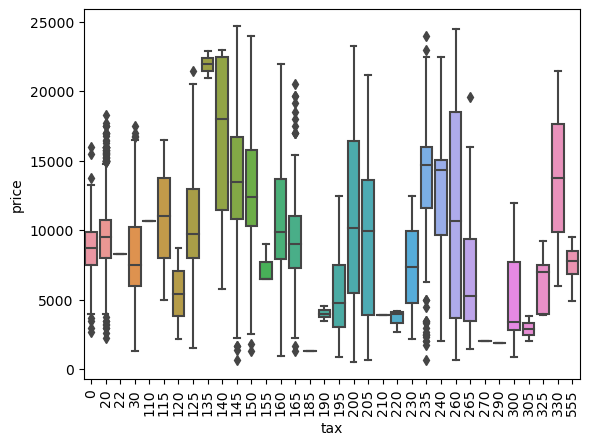

In [ ]:
sns.boxplot(x="tax",y="price",data=df_clean)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, '0.0'),
  Text(1, 0, '1.0'),
  Text(2, 0, '1.1'),
  Text(3, 0, '1.2'),
  Text(4, 0, '1.3'),
  Text(5, 0, '1.4'),
  Text(6, 0, '1.5'),
  Text(7, 0, '1.6'),
  Text(8, 0, '1.7'),
  Text(9, 0, '1.8'),
  Text(10, 0, '2.0'),
  Text(11, 0, '2.2'),
  Text(12, 0, '2.3'),
  Text(13, 0, '2.5'),
  Text(14, 0, '3.2'),
  Text(15, 0, '5.0')])

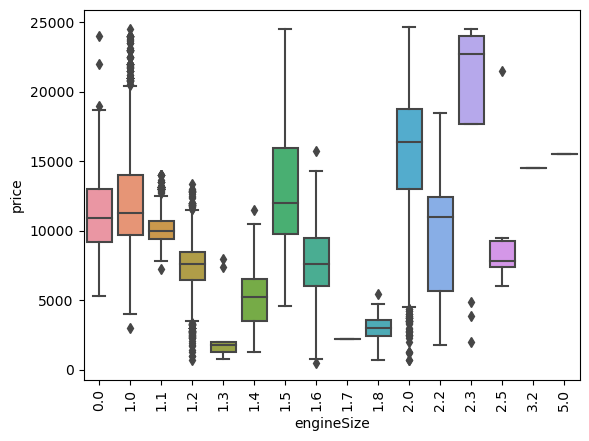

In [ ]:
sns.boxplot(x="engineSize",y="price",data=df_clean)
plt.xticks(rotation=90)

In [ ]:
x= df_clean.drop('price', axis=1)
y=df_clean["price"]
#axis=0->rows and 1 means column drop

In [ ]:
print(y)

0        12000
1        14000
2        13000
3        17500
4        16500
         ...  
17961     8999
17962     7499
17963     9999
17964     8299
17965     8299
Name: price, Length: 17680, dtype: int64


Use Encoding method to change our categorical data into numerical data Here we use two different types of encoding methods to check model efficiency.

First we use LabelEncoder

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
columns=["model","transmission","fuelType"]
xlabel=x

for i in columns:
    xlabel[i]=le.fit_transform(df_clean[i].astype(str))

Fit calculate required statistics for standardScaler . It compute mean and s.d
transform use x-mean/s.d to convert into numeric data

In [ ]:
xlabel

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,log_price
0,5,2017,0,15944,4,150,57.7,1.0,9.392662
1,6,2018,1,9083,4,150,57.7,1.0,9.546813
2,6,2017,1,12456,4,150,57.7,1.0,9.472705
3,5,2019,1,10460,4,145,40.3,1.5,9.769956
4,5,2019,0,1482,4,145,48.7,1.0,9.711116
...,...,...,...,...,...,...,...,...,...
17961,0,2017,1,16700,4,150,47.1,1.4,9.104869
17962,0,2014,1,40700,4,30,57.7,1.0,8.922525
17963,6,2015,1,7010,0,20,67.3,1.6,9.210240
17964,11,2018,1,5007,4,145,57.7,1.2,9.023890


Use Saclling method : Scaling puts numeric features on the same scale so the model treats them fairly.

In [ ]:
from sklearn.preprocessing import StandardScaler
xscaler=StandardScaler()
columns=["year","mileage","tax","mpg","engineSize"]
xscaler.fit(df_clean[columns])  #fit
df_clean = df_clean.copy()
df_clean[columns]=xscaler.transform(df_clean[columns])
df_clean[columns]

,year,mileage,tax,mpg,engineSize
0,0.080147,-0.394148,0.607943,-0.049811,-0.860649
1,0.568094,-0.746045,0.607943,-0.049811,-0.860649
2,0.080147,-0.573046,0.607943,-0.049811,-0.860649
3,1.056040,-0.675419,0.526709,-1.878234,0.434971
4,1.056040,-1.135895,0.526709,-0.995547,-0.860649
...,...,...,...,...,...
17961,0.080147,-0.355374,0.607943,-1.163678,0.175847
17962,-1.383693,0.875571,-1.341686,-0.049811,-0.860649
17963,-0.895747,-0.852368,-1.504156,0.958974,0.694095
17964,0.568094,-0.955100,0.526709,-0.049811,-0.342401


In [ ]:
xlabel.columns

Index(['model', 'year', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg',
       'engineSize', 'log_price'],
      dtype='object')

In [ ]:
xlabel[['model', 'year', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg',
       'engineSize']]=xscaler.fit_transform(xlabel[['model', 'year', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg',
       'engineSize']])
xlabel

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,log_price
0,-0.453197,0.080147,-2.737517,-0.394148,0.682940,0.607943,-0.049811,-0.860649,9.392662
1,-0.200053,0.568094,0.041656,-0.746045,0.682940,0.607943,-0.049811,-0.860649,9.546813
2,-0.200053,0.080147,0.041656,-0.573046,0.682940,0.607943,-0.049811,-0.860649,9.472705
3,-0.453197,1.056040,0.041656,-0.675419,0.682940,0.526709,-1.878234,0.434971,9.769956
4,-0.453197,1.056040,-2.737517,-1.135895,0.682940,0.526709,-0.995547,-0.860649,9.711116
...,...,...,...,...,...,...,...,...,...
17961,-1.718919,0.080147,0.041656,-0.355374,0.682940,0.607943,-1.163678,0.175847,9.104869
17962,-1.718919,-1.383693,0.041656,0.875571,0.682940,-1.341686,-0.049811,-0.860649,8.922525
17963,-0.200053,-0.895747,0.041656,-0.852368,-1.465621,-1.504156,0.958974,0.694095,9.210240
17964,1.065669,0.568094,0.041656,-0.955100,0.682940,0.526709,-0.049811,-0.342401,9.023890


Now we perform LinearRegression Model to our LabelEncoder data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(xlabel,y,test_size=0.25,random_state=42)
#input=result form label encoding and y=price alreday define above

NameError: name 'xlabel' is not defined

In [ ]:
lr=LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

0.9359493155470258

In [ ]:
y_predict=lr.predict(x_test)
y_predict

array([18190.83994091, 18405.60071446, 10038.20334922, ...,
       10144.91030614, 13368.717325  , 14024.7162873 ])

In [ ]:
y_test

6017     20000
17889    17495
5160      9911
745      10498
2358     16450
         ...  
881       8742
5563     19000
17504     9800
5556     13271
3320     13280
Name: price, Length: 4420, dtype: int64

In [ ]:
r2=r2_score(y_test,y_predict)
r2

0.9359493155470258

R² measures how well our model explains the variability of the target (price).
R²=1 means perfect prediction

After doing Data cleaning using IQR method the r2 value change from 0.72 to 0.93

Now perform one hot encoder in our data to check model prediction

In [ ]:
one_hot_encoder=pd.get_dummies(x,columns=["model","transmission","fuelType"],drop_first=True)
one_hot_encoder

,year,mileage,tax,mpg,engineSize,log_price,model_-1.4657742856661824,model_-1.2126299750091853,model_-0.9594856643521882,model_-0.7063413536951911,...,model_3.3439676168167622,model_3.597111927473759,model_3.8502562381307563,model_4.103400548787753,transmission_0.04165615601697945,transmission_2.8208291310365996,fuelType_-0.928480546252044,fuelType_-0.39134052931097074,fuelType_0.14579948763010248,fuelType_0.6829395045711757
0,0.080147,-0.394148,0.607943,-0.049811,-0.860649,9.392662,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,0.568094,-0.746045,0.607943,-0.049811,-0.860649,9.546813,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
2,0.080147,-0.573046,0.607943,-0.049811,-0.860649,9.472705,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
3,1.056040,-0.675419,0.526709,-1.878234,0.434971,9.769956,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
4,1.056040,-1.135895,0.526709,-0.995547,-0.860649,9.711116,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17961,0.080147,-0.355374,0.607943,-1.163678,0.175847,9.104869,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
17962,-1.383693,0.875571,-1.341686,-0.049811,-0.860649,8.922525,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
17963,-0.895747,-0.852368,-1.504156,0.958974,0.694095,9.210240,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
17964,0.568094,-0.955100,0.526709,-0.049811,-0.342401,9.023890,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(one_hot_encoder,y,test_size=0.25,random_state=42)


In [ ]:
new_model=LinearRegression()
new_model.fit(x_train,y_train)
new_model.score(x_test,y_test)

0.9454077463921742

In [ ]:
y_predict=new_model.predict(x_test)
y_predict

array([18827.61604095, 18892.08262805,  9964.55286626, ...,
       10401.64114271, 13612.95489341, 14081.50477159])

In [ ]:
y_test

6017     20000
17889    17495
5160      9911
745      10498
2358     16450
         ...  
881       8742
5563     19000
17504     9800
5556     13271
3320     13280
Name: price, Length: 4420, dtype: int64

In [ ]:
r2=r2_score(y_test,y_predict)
r2

0.9454077463921742

In [ ]:
n = x_test.shape[0]      
p = x_test.shape[1]    

adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
adj_r2

0.9449719049514183

In [ ]:
after IQR method adj_r2 change from 0.83 to o.94

Here onehotEncoder perform much better on our data then LabelEncoding